In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [2]:
mathData = pd.read_csv('data/student-mat.csv', sep=';')
porData = pd.read_csv('data/student-por.csv', sep=';')

In [3]:
print("Mathematics dataset shape:", mathData.shape)
print("Portuguese dataset shape:", porData.shape)

Mathematics dataset shape: (395, 33)
Portuguese dataset shape: (649, 33)


In [4]:
print("Mathematics dataset preview:")
display(mathData.head())

Mathematics dataset preview:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
print("Portuguese dataset preview:")
display(porData.head())

Portuguese dataset preview:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [6]:
print("Missing values in Mathematics dataset:")
print(mathData.isnull().sum().sum())

Missing values in Mathematics dataset:
0


In [7]:
print("Missing values in Portuguese dataset:")
print(porData.isnull().sum().sum())

Missing values in Portuguese dataset:
0


In [8]:
print("Mathematics dataset data types:")
print(mathData.dtypes)

Mathematics dataset data types:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [9]:
print("Portuguese dataset data types:")
print(porData.dtypes)

Portuguese dataset data types:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [10]:
porSummary = porData.describe()
print("\nSummary statistics for Portuguese dataset:")
display(porSummary)


Summary statistics for Portuguese dataset:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [11]:
mathSummary = mathData.describe()
print("\nSummary statistics for Math dataset:")
display(mathSummary)


Summary statistics for Math dataset:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000



Distribution of final grades (G3):
G3
0     38
4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
15    33
16    16
17     6
18    12
19     5
20     1
Name: count, dtype: int64


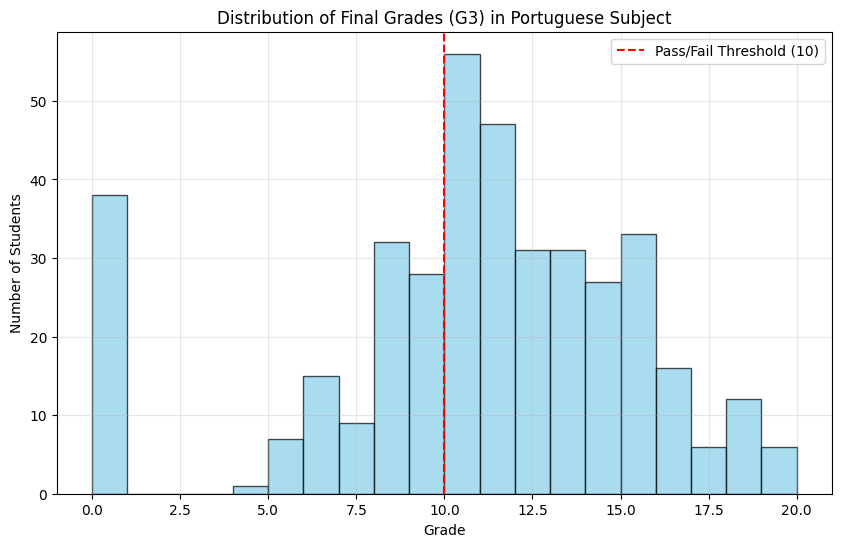

In [12]:
print("\nDistribution of final grades (G3):")
print(mathData['G3'].value_counts().sort_index())

plt.figure(figsize=(10, 6))
plt.hist(mathData['G3'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=10, color='red', linestyle='--', label='Pass/Fail Threshold (10)')
plt.title('Distribution of Final Grades (G3) in Portuguese Subject')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Distribution of final grades (G3):
G3
0      15
1       1
5       1
6       3
7      10
8      35
9      35
10     97
11    104
12     72
13     82
14     63
15     49
16     36
17     29
18     15
19      2
Name: count, dtype: int64


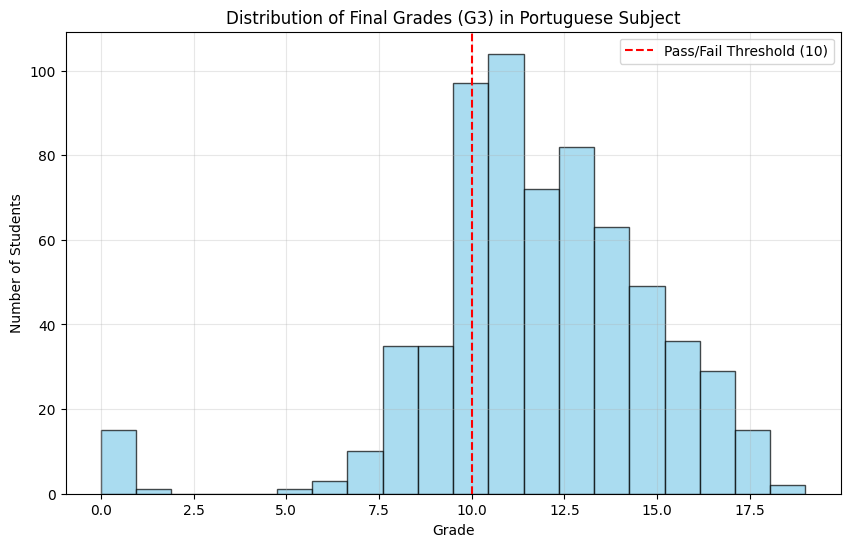

In [13]:
print("\nDistribution of final grades (G3):")
print(porData['G3'].value_counts().sort_index())

plt.figure(figsize=(10, 6))
plt.hist(porData['G3'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=10, color='red', linestyle='--', label='Pass/Fail Threshold (10)')
plt.title('Distribution of Final Grades (G3) in Portuguese Subject')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [14]:
passThreshold = 10
passed = porData[porData['G3'] >= passThreshold].shape[0]
failed = porData[porData['G3'] < passThreshold].shape[0]
total = porData.shape[0]

print(f"Pass/Fail Statistics:")
print(f"Passed: {passed} students ({passed/total*100:.2f}%)")
print(f"Failed: {failed} students ({failed/total*100:.2f}%)")

Pass/Fail Statistics:
Passed: 549 students (84.59%)
Failed: 100 students (15.41%)


Correlation matrix for grade periods:


,G1,G2,G3
G1,1.000000,0.864982,0.826387
G2,0.864982,1.000000,0.918548
G3,0.826387,0.918548,1.000000


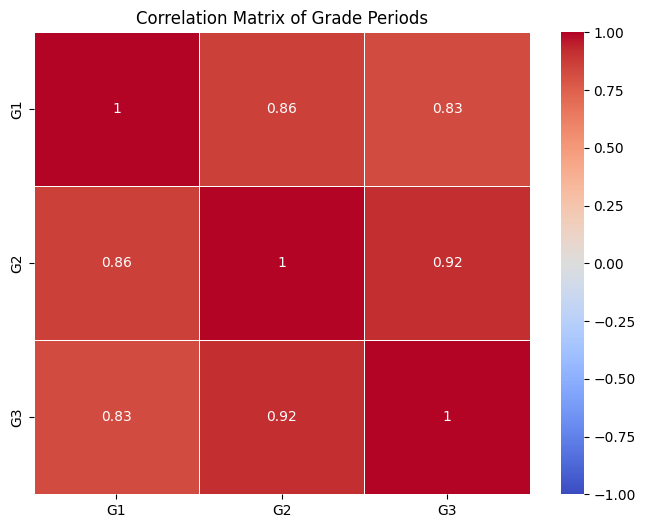

In [15]:
gradeCols = ['G1', 'G2', 'G3']
gradeCorr = porData[gradeCols].corr()

print("Correlation matrix for grade periods:")
display(gradeCorr)

plt.figure(figsize=(8, 6))
sns.heatmap(gradeCorr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Grade Periods')
plt.show()

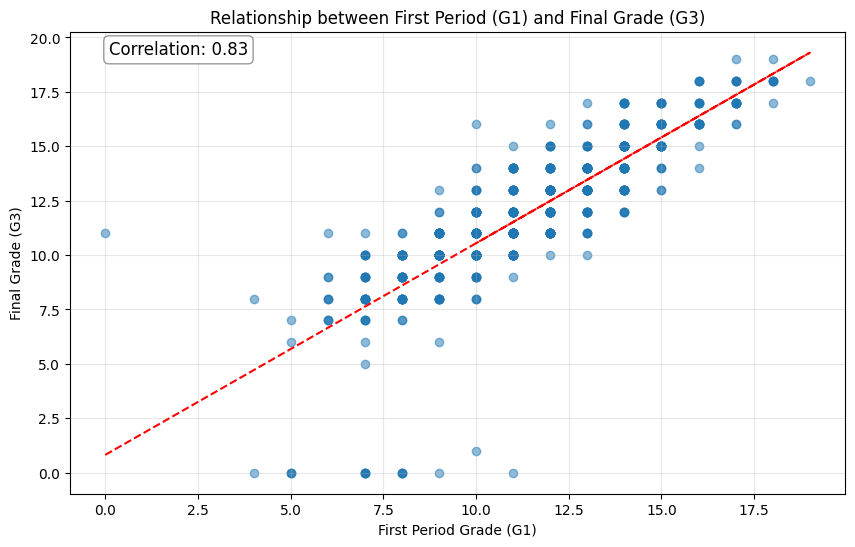

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(porData['G1'], porData['G3'], alpha=0.5)
plt.title('Relationship between First Period (G1) and Final Grade (G3)')
plt.xlabel('First Period Grade (G1)')
plt.ylabel('Final Grade (G3)')
plt.grid(True, alpha=0.3)

x = porData['G1']
y = porData['G3']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

corr = porData['G1'].corr(porData['G3'])
plt.annotate(f"Correlation: {corr:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', 
             fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.show()

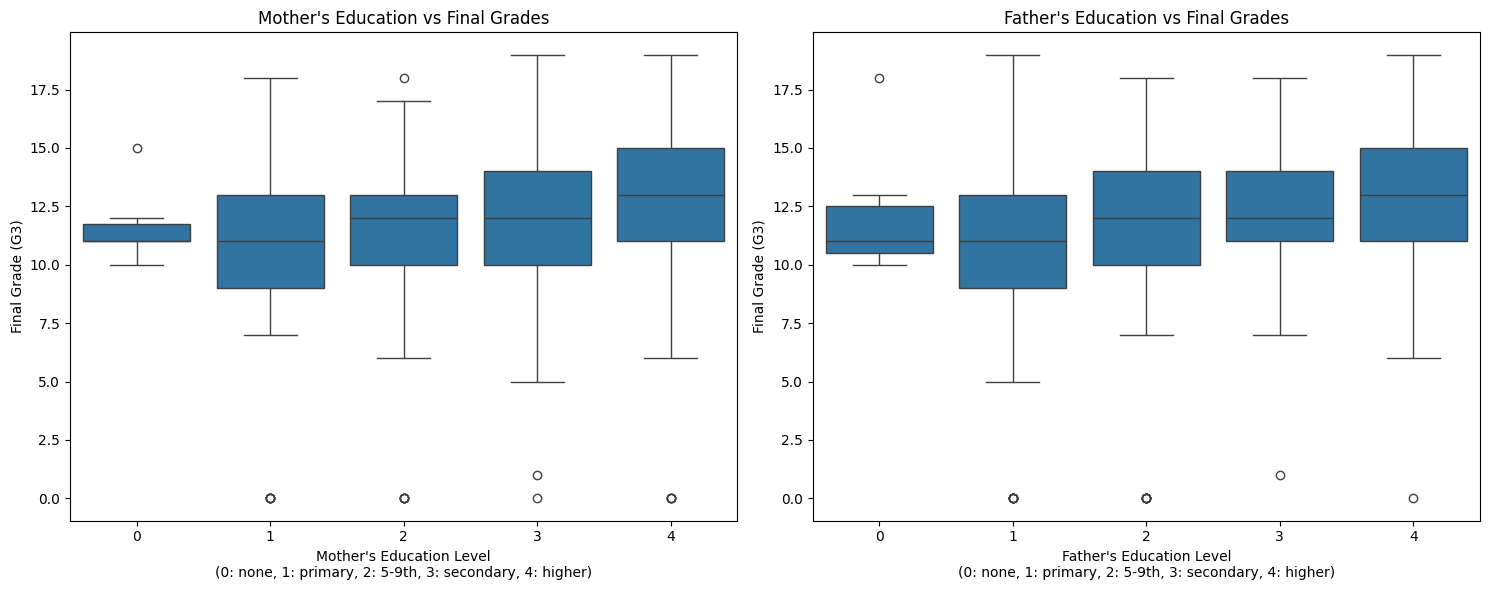

In [17]:
familyFactors = ['Medu', 'Fedu', 'famrel', 'famsup', 'Pstatus', 'famsize']

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Medu', y='G3', data=porData)
plt.title("Mother's Education vs Final Grades")
plt.xlabel("Mother's Education Level\n(0: none, 1: primary, 2: 5-9th, 3: secondary, 4: higher)")
plt.ylabel('Final Grade (G3)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Fedu', y='G3', data=porData)
plt.title("Father's Education vs Final Grades")
plt.xlabel("Father's Education Level\n(0: none, 1: primary, 2: 5-9th, 3: secondary, 4: higher)")
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

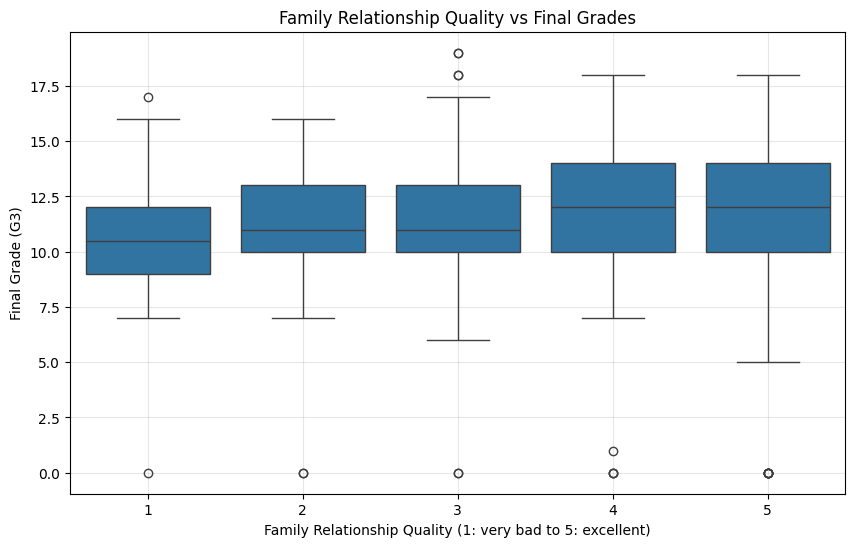

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='famrel', y='G3', data=porData)
plt.title('Family Relationship Quality vs Final Grades')
plt.xlabel('Family Relationship Quality (1: very bad to 5: excellent)')
plt.ylabel('Final Grade (G3)')
plt.grid(True, alpha=0.3)
plt.show()

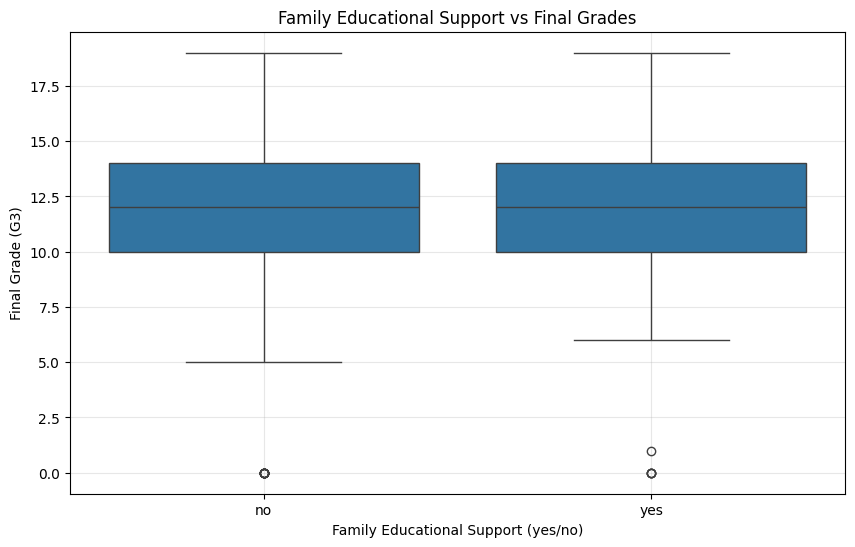

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='famsup', y='G3', data=porData)
plt.title('Family Educational Support vs Final Grades')
plt.xlabel('Family Educational Support (yes/no)')
plt.ylabel('Final Grade (G3)')
plt.grid(True, alpha=0.3)
plt.show()

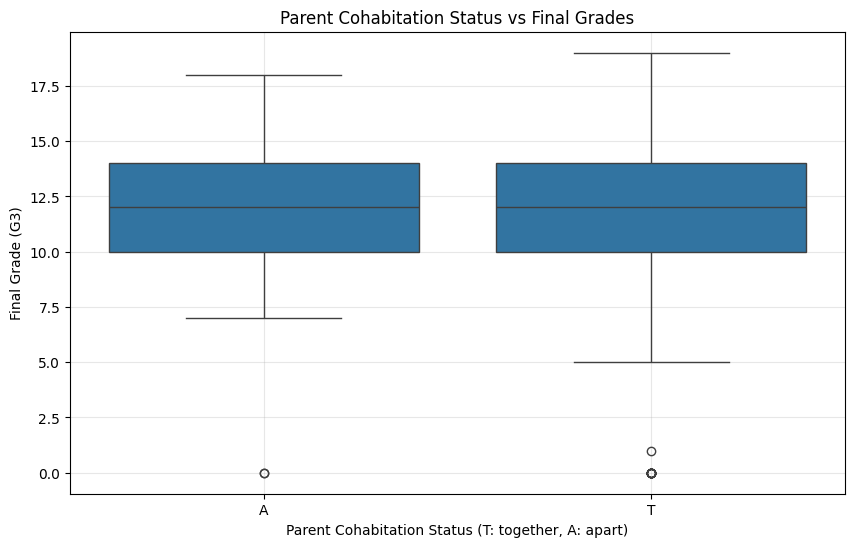

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pstatus', y='G3', data=porData)
plt.title('Parent Cohabitation Status vs Final Grades')
plt.xlabel('Parent Cohabitation Status (T: together, A: apart)')
plt.ylabel('Final Grade (G3)')
plt.grid(True, alpha=0.3)
plt.show()

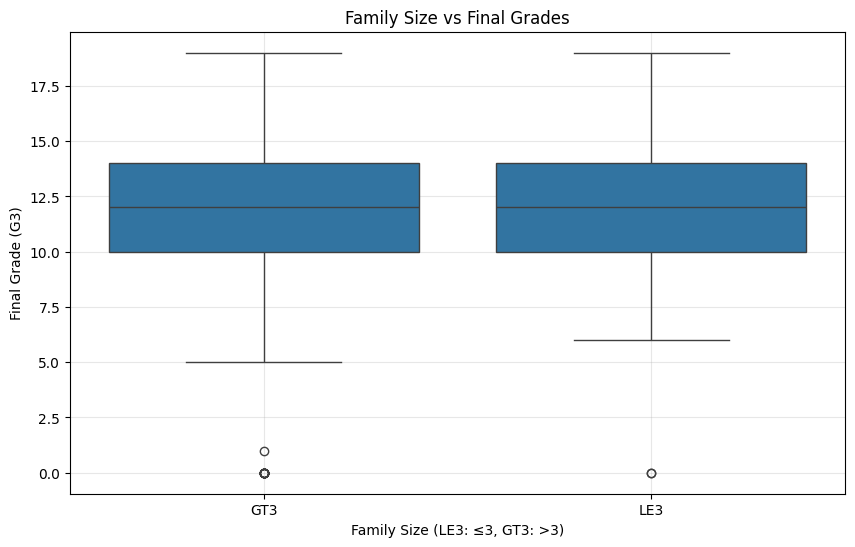

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='famsize', y='G3', data=porData)
plt.title('Family Size vs Final Grades')
plt.xlabel('Family Size (LE3: ≤3, GT3: >3)')
plt.ylabel('Final Grade (G3)')
plt.grid(True, alpha=0.3)
plt.show()


Correlation between family factors and final grade:


G3         1.000000
Medu       0.240151
Fedu       0.211800
famrel     0.063361
famsup     0.059206
Pstatus   -0.000754
famsize   -0.045016
Name: G3, dtype: float64

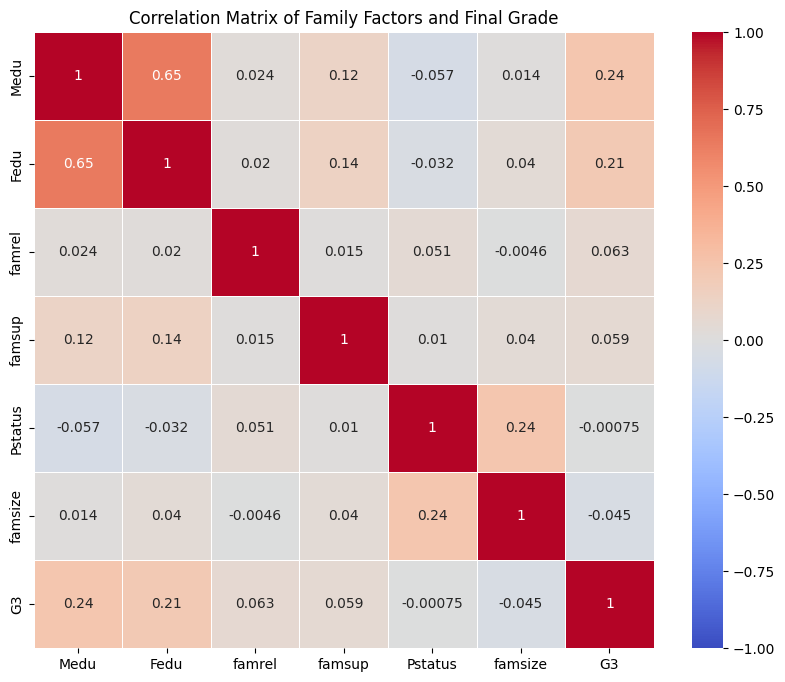

In [22]:
familyData = porData[familyFactors + ['G3']].copy()

familyData['famsup'] = familyData['famsup'].map({'yes': 1, 'no': 0})
familyData['Pstatus'] = familyData['Pstatus'].map({'T': 1, 'A': 0})
familyData['famsize'] = familyData['famsize'].map({'GT3': 1, 'LE3': 0})

familyGradeCorr = familyData.corr()
print("\nCorrelation between family factors and final grade:")
display(familyGradeCorr['G3'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(familyGradeCorr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Family Factors and Final Grade')
plt.show()

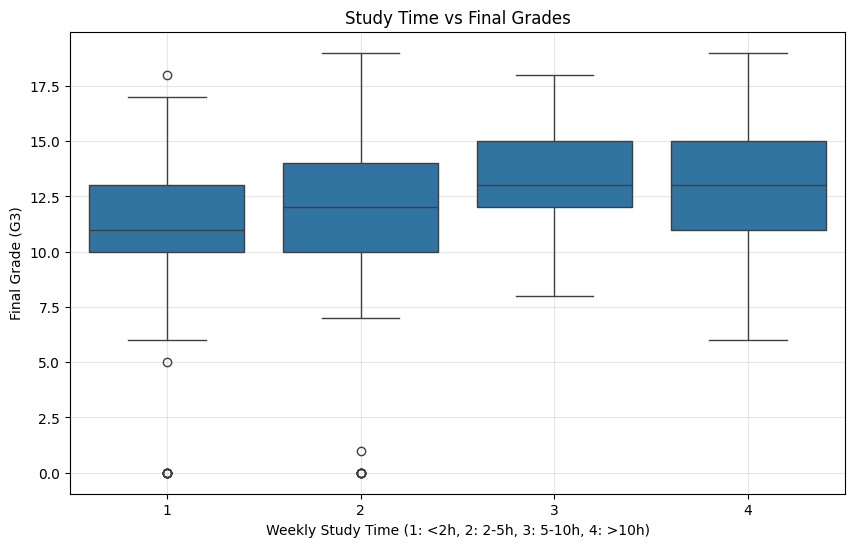

In [23]:
studyVars = ['studytime', 'absences', 'internet', 'schoolsup', 'paid']

plt.figure(figsize=(10, 6))
sns.boxplot(x='studytime', y='G3', data=porData)
plt.title('Study Time vs Final Grades')
plt.xlabel('Weekly Study Time (1: <2h, 2: 2-5h, 3: 5-10h, 4: >10h)')
plt.ylabel('Final Grade (G3)')
plt.grid(True, alpha=0.3)
plt.show()

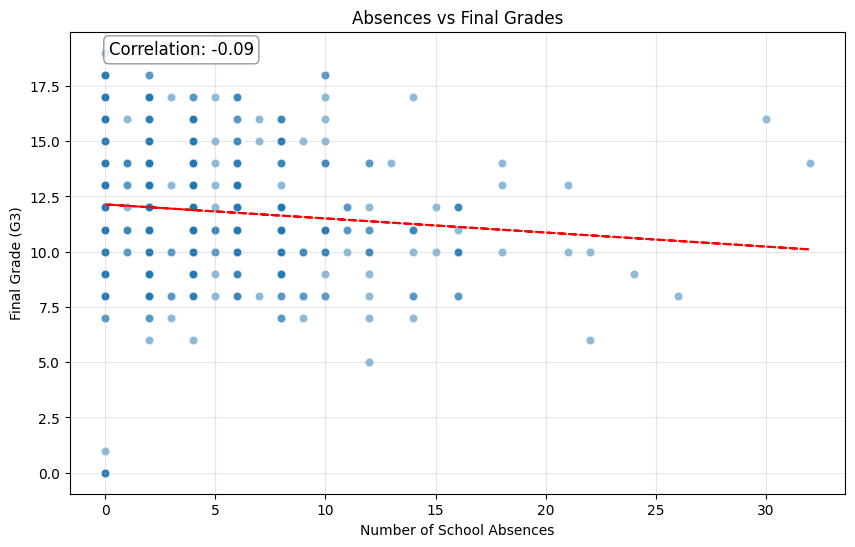

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='absences', y='G3', data=porData, alpha=0.5)
plt.title('Absences vs Final Grades')
plt.xlabel('Number of School Absences')
plt.ylabel('Final Grade (G3)')
plt.grid(True, alpha=0.3)

x = porData['absences']
y = porData['G3']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

corr = porData['absences'].corr(porData['G3'])
plt.annotate(f"Correlation: {corr:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', 
             fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
plt.show()

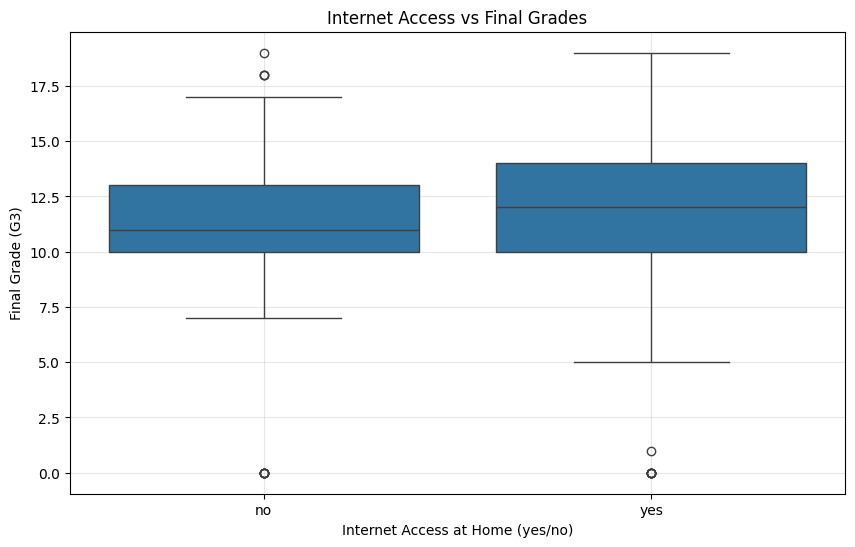

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='internet', y='G3', data=porData)
plt.title('Internet Access vs Final Grades')
plt.xlabel('Internet Access at Home (yes/no)')
plt.ylabel('Final Grade (G3)')
plt.grid(True, alpha=0.3)
plt.show()

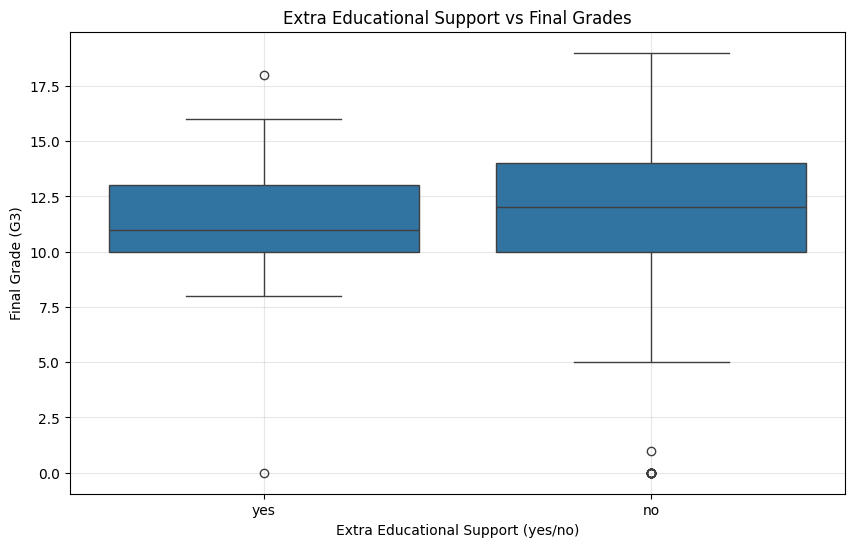

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='schoolsup', y='G3', data=porData)
plt.title('Extra Educational Support vs Final Grades')
plt.xlabel('Extra Educational Support (yes/no)')
plt.ylabel('Final Grade (G3)')
plt.grid(True, alpha=0.3)
plt.show()

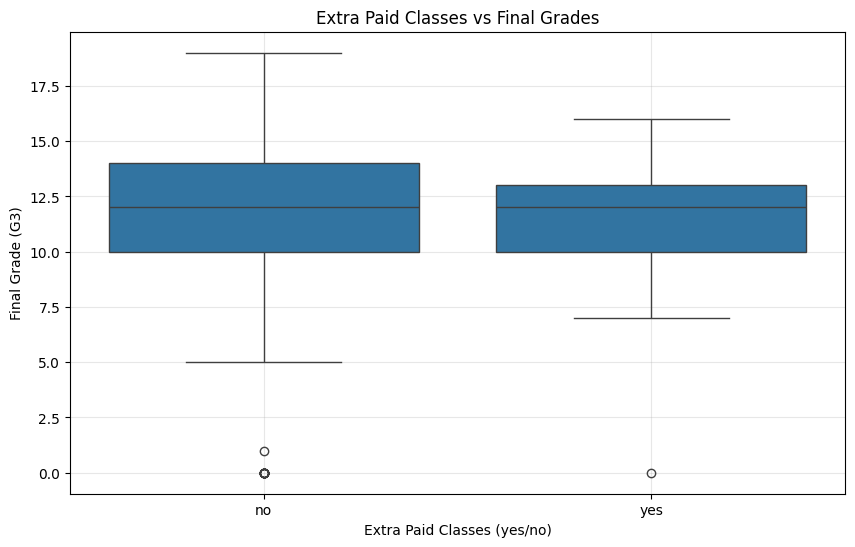

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='paid', y='G3', data=porData)
plt.title('Extra Paid Classes vs Final Grades')
plt.xlabel('Extra Paid Classes (yes/no)')
plt.ylabel('Final Grade (G3)')
plt.grid(True, alpha=0.3)
plt.show()


Correlation between study habits and final grade:


G3           1.000000
studytime    0.249789
internet     0.150025
paid        -0.054898
schoolsup   -0.066405
absences    -0.091379
Name: G3, dtype: float64

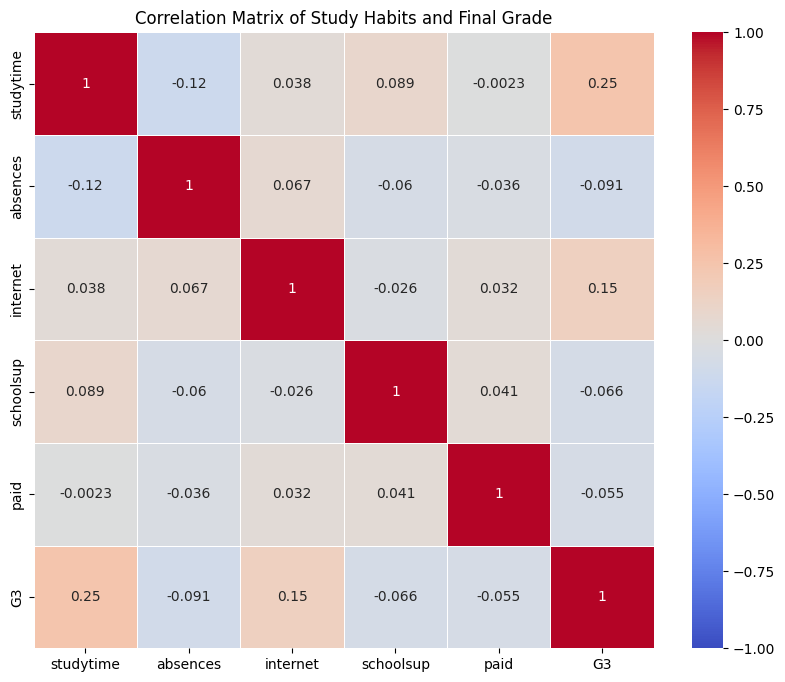

In [28]:
studyData = porData[studyVars + ['G3']].copy()
studyData['internet'] = studyData['internet'].map({'yes': 1, 'no': 0})
studyData['schoolsup'] = studyData['schoolsup'].map({'yes': 1, 'no': 0})
studyData['paid'] = studyData['paid'].map({'yes': 1, 'no': 0})

studyGradeCorr = studyData.corr()
print("\nCorrelation between study habits and final grade:")
display(studyGradeCorr['G3'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(studyGradeCorr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Study Habits and Final Grade')
plt.show()

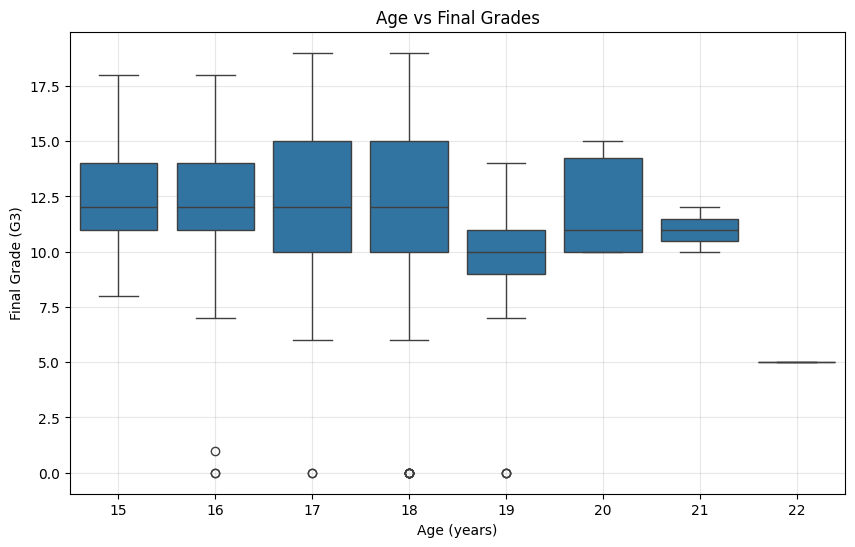

In [29]:
personalVars = ['age', 'sex', 'health', 'goout', 'romantic', 'Dalc', 'Walc', 'activities']

plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='G3', data=porData)
plt.title('Age vs Final Grades')
plt.xlabel('Age (years)')
plt.ylabel('Final Grade (G3)')
plt.grid(True, alpha=0.3)
plt.show()

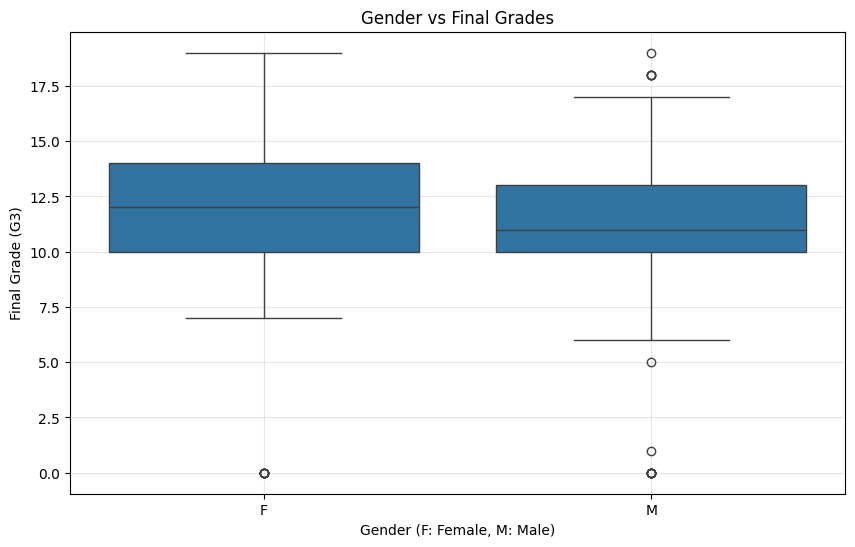

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='G3', data=porData)
plt.title('Gender vs Final Grades')
plt.xlabel('Gender (F: Female, M: Male)')
plt.ylabel('Final Grade (G3)')
plt.grid(True, alpha=0.3)
plt.show()

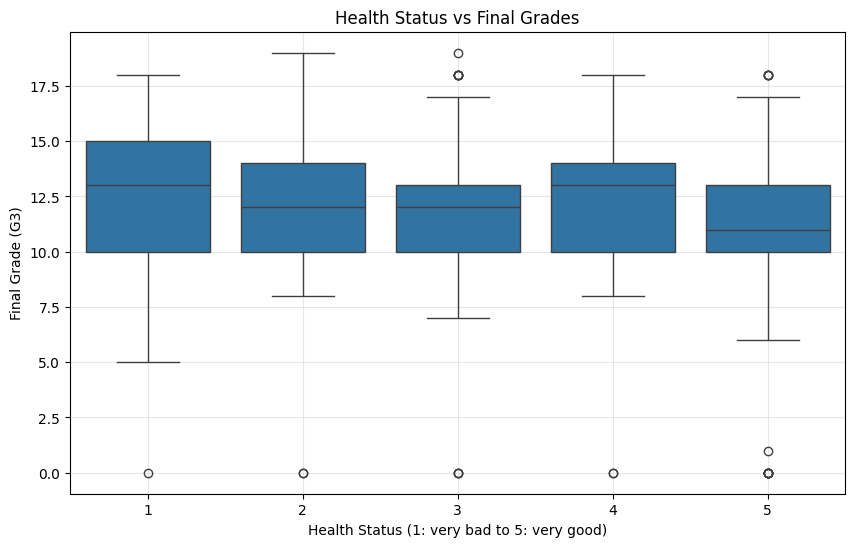

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='health', y='G3', data=porData)
plt.title('Health Status vs Final Grades')
plt.xlabel('Health Status (1: very bad to 5: very good)')
plt.ylabel('Final Grade (G3)')
plt.grid(True, alpha=0.3)
plt.show()

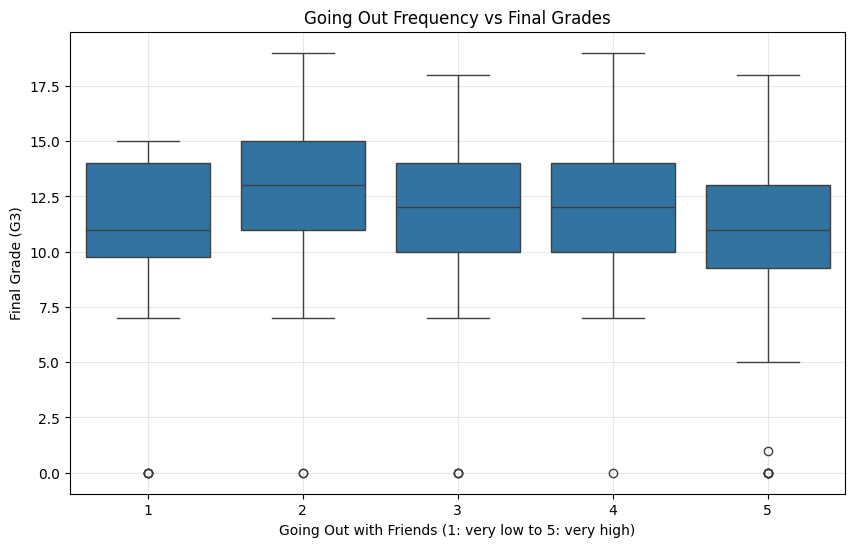

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='goout', y='G3', data=porData)
plt.title('Going Out Frequency vs Final Grades')
plt.xlabel('Going Out with Friends (1: very low to 5: very high)')
plt.ylabel('Final Grade (G3)')
plt.grid(True, alpha=0.3)
plt.show()

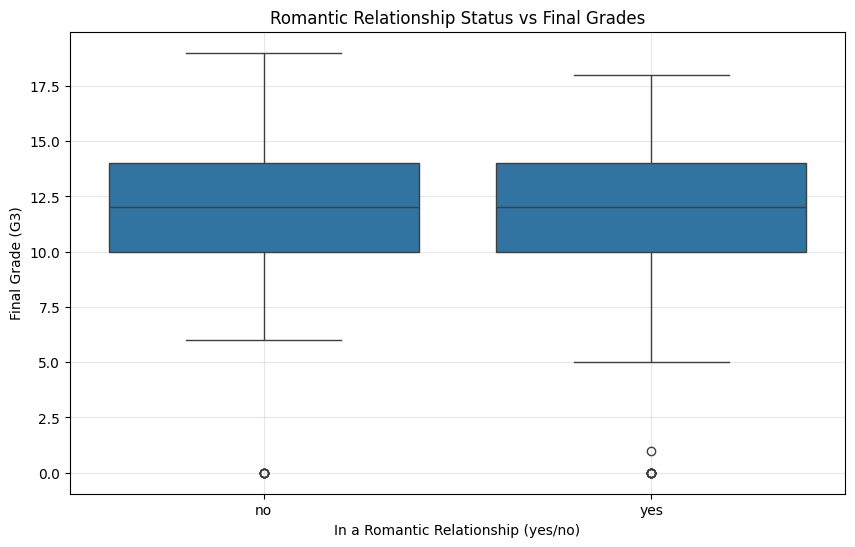

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='romantic', y='G3', data=porData)
plt.title('Romantic Relationship Status vs Final Grades')
plt.xlabel('In a Romantic Relationship (yes/no)')
plt.ylabel('Final Grade (G3)')
plt.grid(True, alpha=0.3)
plt.show()

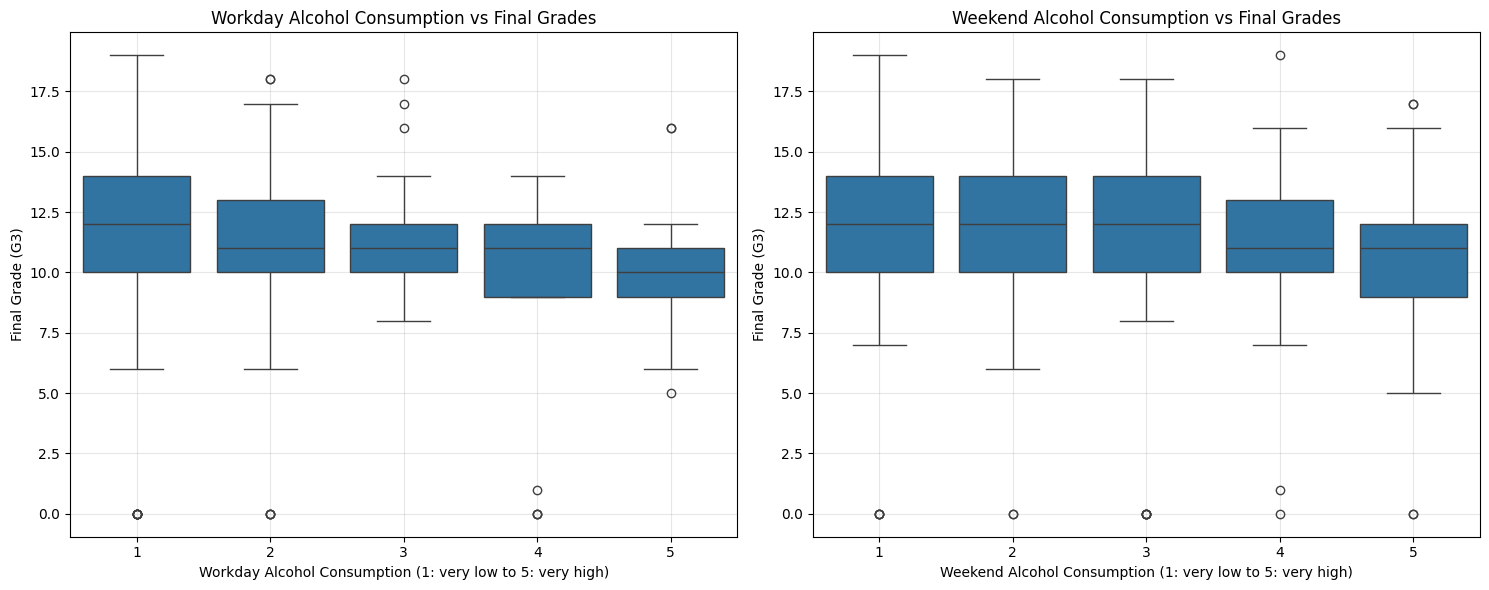

In [34]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Dalc', y='G3', data=porData)
plt.title('Workday Alcohol Consumption vs Final Grades')
plt.xlabel('Workday Alcohol Consumption (1: very low to 5: very high)')
plt.ylabel('Final Grade (G3)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
sns.boxplot(x='Walc', y='G3', data=porData)
plt.title('Weekend Alcohol Consumption vs Final Grades')
plt.xlabel('Weekend Alcohol Consumption (1: very low to 5: very high)')
plt.ylabel('Final Grade (G3)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Correlation between personal factors and final grade:


G3            1.000000
sex           0.129077
activities    0.059791
goout        -0.087641
romantic     -0.090583
health       -0.098851
age          -0.106505
Walc         -0.176619
Dalc         -0.204719
Name: G3, dtype: float64

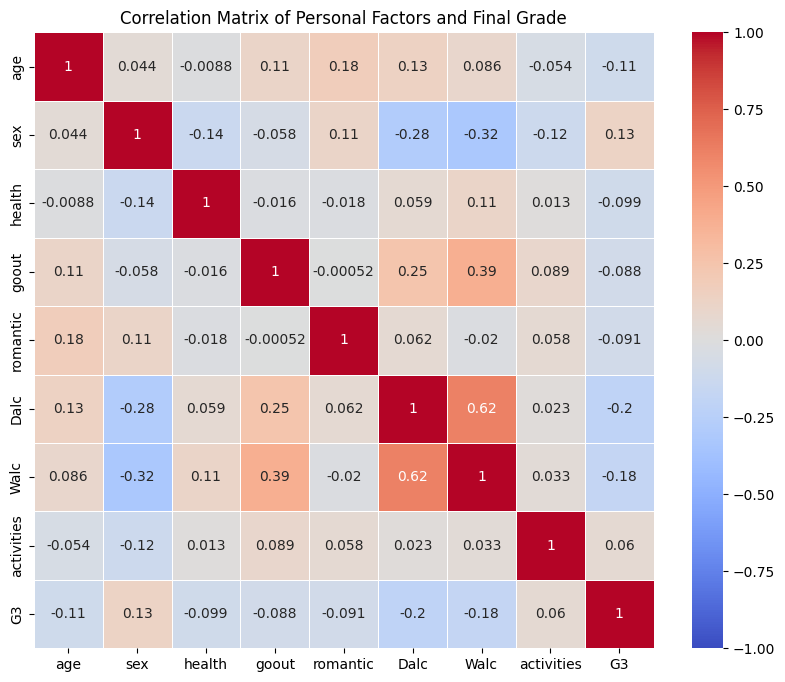

In [35]:
personalData = porData[personalVars + ['G3']].copy()
personalData['sex'] = personalData['sex'].map({'F': 1, 'M': 0})
personalData['romantic'] = personalData['romantic'].map({'yes': 1, 'no': 0})
if 'activities' in personalData.columns:
    personalData['activities'] = personalData['activities'].map({'yes': 1, 'no': 0})

personalGradeCorr = personalData.corr()
print("\nCorrelation between personal factors and final grade:")
display(personalGradeCorr['G3'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(personalGradeCorr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Personal Factors and Final Grade')
plt.show()

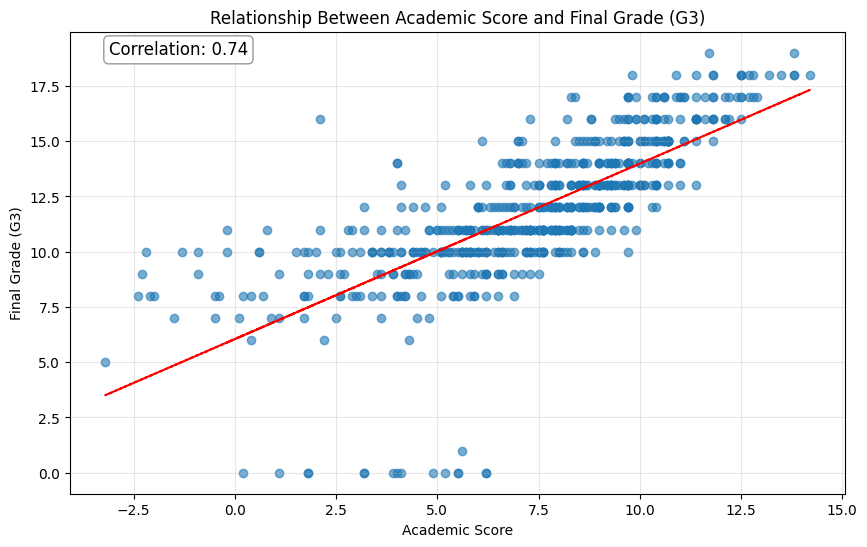

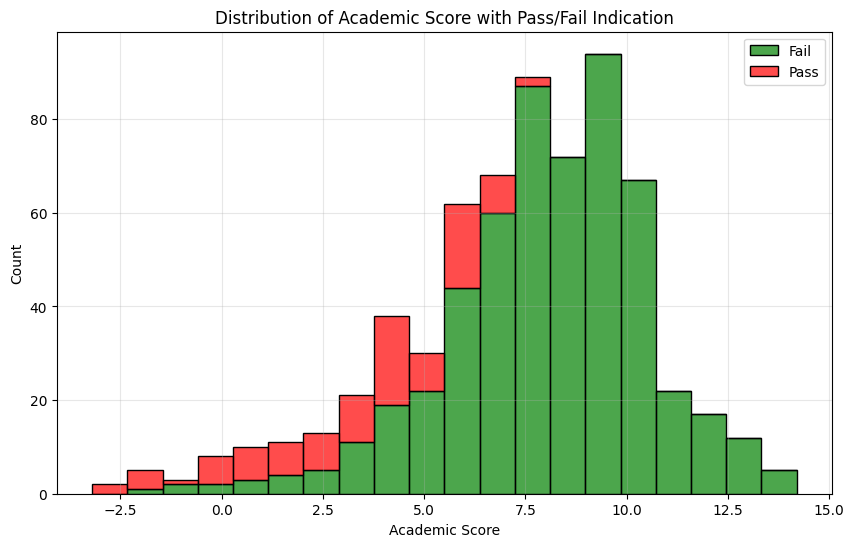

Correlation between Academic Score and G3: 0.7354
Best Academic Score threshold for predicting pass/fail: 4.36
Accuracy at this threshold: 0.88


In [36]:
porData['Academic_Score'] = (0.7 * porData['G1']) - (2 * porData['failures']) + (0.3 * porData['studytime']) - (0.2 * porData['absences'])

plt.figure(figsize=(10, 6))
plt.scatter(porData['Academic_Score'], porData['G3'], alpha=0.6)
plt.title('Relationship Between Academic Score and Final Grade (G3)')
plt.xlabel('Academic Score')
plt.ylabel('Final Grade (G3)')
plt.grid(True, alpha=0.3)

x = porData['Academic_Score']
y = porData['G3']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

corr = porData['Academic_Score'].corr(porData['G3'])
plt.annotate(f"Correlation: {corr:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', 
             fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=porData, x='Academic_Score', hue=porData['G3'] >= passThreshold, 
             multiple="stack", palette=['red', 'green'], alpha=0.7, bins=20)
plt.title('Distribution of Academic Score with Pass/Fail Indication')
plt.xlabel('Academic Score')
plt.ylabel('Count')
plt.legend(['Fail', 'Pass'])
plt.grid(True, alpha=0.3)
plt.show()

print(f"Correlation between Academic Score and G3: {corr:.4f}")

thresholds = np.linspace(porData['Academic_Score'].min(), porData['Academic_Score'].max(), 100)
accuracies = []

for threshold in thresholds:
    predicted_pass = porData['Academic_Score'] >= threshold
    actual_pass = porData['G3'] >= passThreshold
    accuracy = np.mean(predicted_pass == actual_pass)
    accuracies.append(accuracy)

best_threshold = thresholds[np.argmax(accuracies)]
best_accuracy = np.max(accuracies)

print(f"Best Academic Score threshold for predicting pass/fail: {best_threshold:.2f}")
print(f"Accuracy at this threshold: {best_accuracy:.2f}")

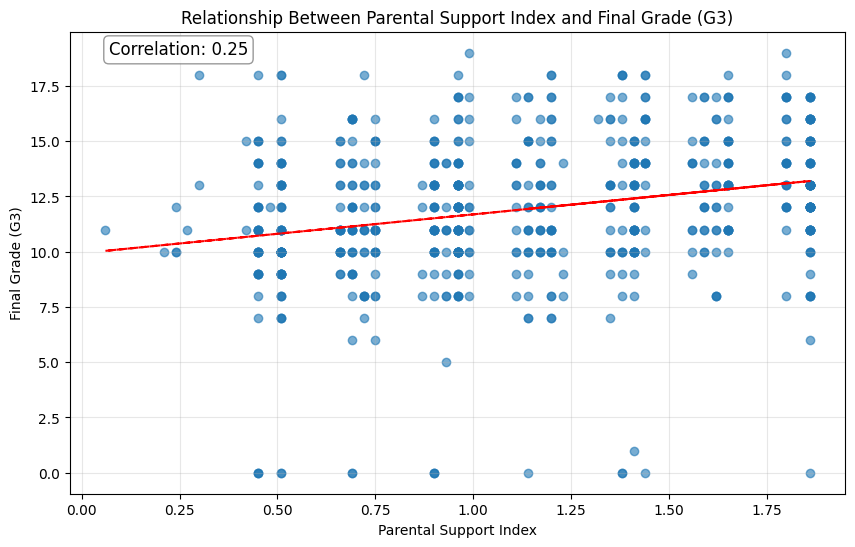

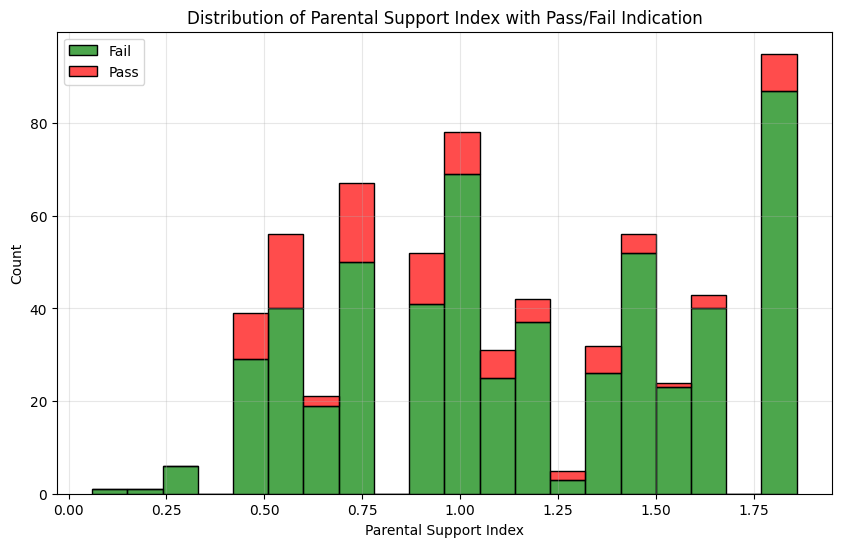

Correlation between Parental Support Index and G3: 0.2511
Best Parental Support Index threshold for predicting pass/fail: 0.06
Accuracy at this threshold: 0.85


In [37]:
porData['Parental_Support'] = (0.24 * porData['Medu']) + (0.21 * porData['Fedu']) + (0.06 * porData['famsup'].map({'yes': 1, 'no': 0}))

plt.figure(figsize=(10, 6))
plt.scatter(porData['Parental_Support'], porData['G3'], alpha=0.6)
plt.title('Relationship Between Parental Support Index and Final Grade (G3)')
plt.xlabel('Parental Support Index')
plt.ylabel('Final Grade (G3)')
plt.grid(True, alpha=0.3)

x = porData['Parental_Support']
y = porData['G3']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

corr = porData['Parental_Support'].corr(porData['G3'])
plt.annotate(f"Correlation: {corr:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', 
             fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=porData, x='Parental_Support', hue=porData['G3'] >= passThreshold, 
             multiple="stack", palette=['red', 'green'], alpha=0.7, bins=20)
plt.title('Distribution of Parental Support Index with Pass/Fail Indication')
plt.xlabel('Parental Support Index')
plt.ylabel('Count')
plt.legend(['Fail', 'Pass'])
plt.grid(True, alpha=0.3)
plt.show()

print(f"Correlation between Parental Support Index and G3: {corr:.4f}")

thresholds = np.linspace(porData['Parental_Support'].min(), porData['Parental_Support'].max(), 100)
accuracies = []

for threshold in thresholds:
    predicted_pass = porData['Parental_Support'] >= threshold
    actual_pass = porData['G3'] >= passThreshold
    accuracy = np.mean(predicted_pass == actual_pass)
    accuracies.append(accuracy)

best_threshold = thresholds[np.argmax(accuracies)]
best_accuracy = np.max(accuracies)

print(f"Best Parental Support Index threshold for predicting pass/fail: {best_threshold:.2f}")
print(f"Accuracy at this threshold: {best_accuracy:.2f}")

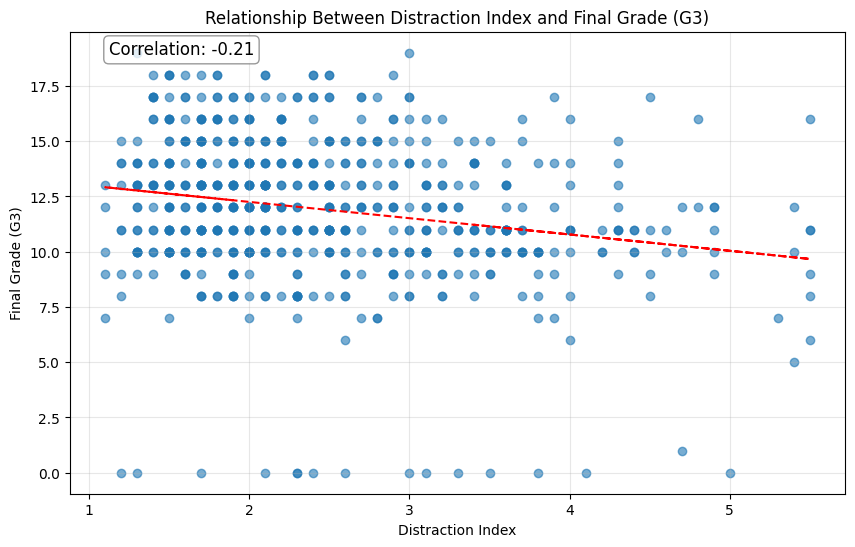

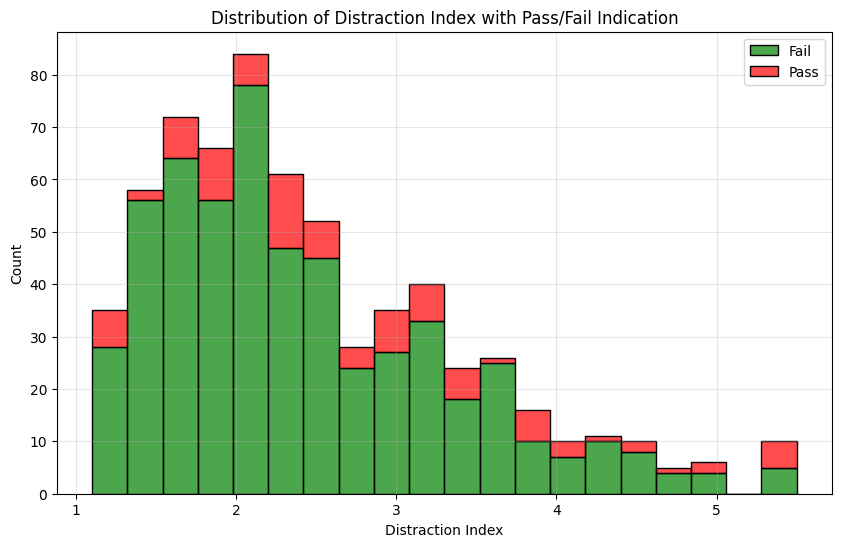

Correlation between Distraction Index and G3: -0.2136
Best Distraction Index threshold for predicting pass/fail: 4.92
Accuracy at this threshold: 0.85


In [38]:
porData['Distraction_Index'] = (0.2 * porData['goout']) + (0.4 * porData['Walc']) + (0.4 * porData['Dalc']) + (0.1 * porData['freetime'])

plt.figure(figsize=(10, 6))
plt.scatter(porData['Distraction_Index'], porData['G3'], alpha=0.6)
plt.title('Relationship Between Distraction Index and Final Grade (G3)')
plt.xlabel('Distraction Index')
plt.ylabel('Final Grade (G3)')
plt.grid(True, alpha=0.3)

x = porData['Distraction_Index']
y = porData['G3']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

corr = porData['Distraction_Index'].corr(porData['G3'])
plt.annotate(f"Correlation: {corr:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', 
             fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=porData, x='Distraction_Index', hue=porData['G3'] >= passThreshold, 
             multiple="stack", palette=['red', 'green'], alpha=0.7, bins=20)
plt.title('Distribution of Distraction Index with Pass/Fail Indication')
plt.xlabel('Distraction Index')
plt.ylabel('Count')
plt.legend(['Fail', 'Pass'])
plt.grid(True, alpha=0.3)
plt.show()

print(f"Correlation between Distraction Index and G3: {corr:.4f}")


thresholds = np.linspace(porData['Distraction_Index'].min(), porData['Distraction_Index'].max(), 100)
accuracies = []

for threshold in thresholds:
    # For Distraction Index, LOWER values predict passing
    predicted_pass = porData['Distraction_Index'] <= threshold
    actual_pass = porData['G3'] >= passThreshold
    accuracy = np.mean(predicted_pass == actual_pass)
    accuracies.append(accuracy)

best_threshold = thresholds[np.argmax(accuracies)]
best_accuracy = np.max(accuracies)

print(f"Best Distraction Index threshold for predicting pass/fail: {best_threshold:.2f}")
print(f"Accuracy at this threshold: {best_accuracy:.2f}")

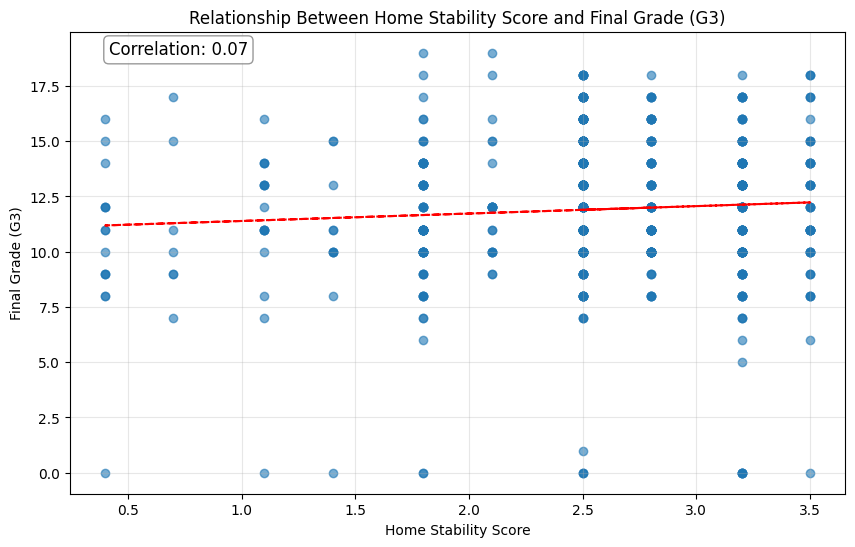

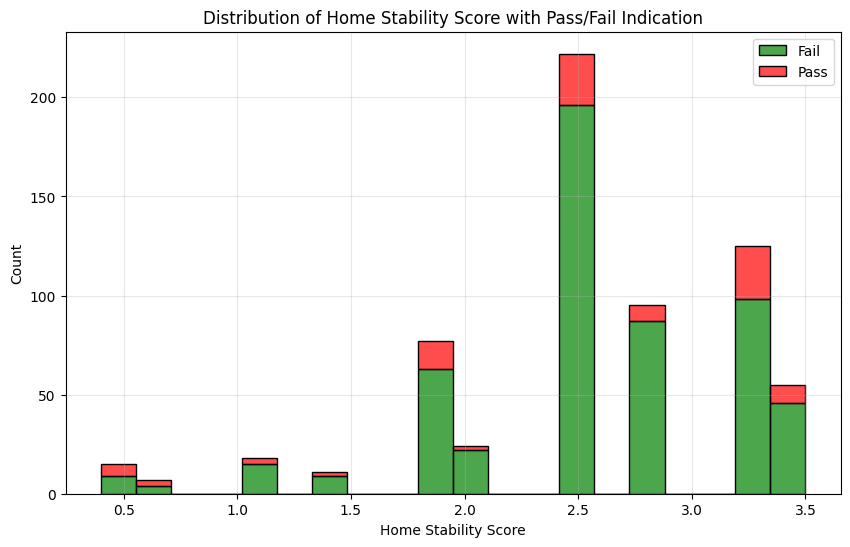

Correlation between Home Stability Score and G3: 0.0710
Best Home Stability Score threshold for predicting pass/fail: 0.40
Accuracy at this threshold: 0.85


In [39]:
porData['famsize_num'] = porData['famsize'].map({'GT3': 1, 'LE3': 0})  
porData['Pstatus_num'] = porData['Pstatus'].map({'T': 1, 'A': 0})  

porData['Home_Stability'] = (0.7 * porData['famrel']) - (0.3 * porData['famsize_num']) + (0.0 * porData['Pstatus_num'])

plt.figure(figsize=(10, 6))
plt.scatter(porData['Home_Stability'], porData['G3'], alpha=0.6)
plt.title('Relationship Between Home Stability Score and Final Grade (G3)')
plt.xlabel('Home Stability Score')
plt.ylabel('Final Grade (G3)')
plt.grid(True, alpha=0.3)

x = porData['Home_Stability']
y = porData['G3']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

corr = porData['Home_Stability'].corr(porData['G3'])
plt.annotate(f"Correlation: {corr:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', 
             fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=porData, x='Home_Stability', hue=porData['G3'] >= passThreshold, 
             multiple="stack", palette=['red', 'green'], alpha=0.7, bins=20)
plt.title('Distribution of Home Stability Score with Pass/Fail Indication')
plt.xlabel('Home Stability Score')
plt.ylabel('Count')
plt.legend(['Fail', 'Pass'])
plt.grid(True, alpha=0.3)
plt.show()
print(f"Correlation between Home Stability Score and G3: {corr:.4f}")

thresholds = np.linspace(porData['Home_Stability'].min(), porData['Home_Stability'].max(), 100)
accuracies = []

for threshold in thresholds:
    predicted_pass = porData['Home_Stability'] >= threshold
    actual_pass = porData['G3'] >= passThreshold
    accuracy = np.mean(predicted_pass == actual_pass)
    accuracies.append(accuracy)

best_threshold = thresholds[np.argmax(accuracies)]
best_accuracy = np.max(accuracies)

print(f"Best Home Stability Score threshold for predicting pass/fail: {best_threshold:.2f}")
print(f"Accuracy at this threshold: {best_accuracy:.2f}")

In [41]:
def prepareData(X, y, testSize=0.3, randomState=42, stratify=None):
    if stratify is not None:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=testSize, random_state=randomState, stratify=stratify)
    else:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=testSize, random_state=randomState)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

Optimization terminated successfully.
         Current function value: 0.888890
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
                             OrderedModel Results                             
Dep. Variable:          gradeCategory   Log-Likelihood:                -403.56
Model:                   OrderedModel   AIC:                             829.1
Method:            Maximum Likelihood   BIC:                             874.4
Date:                Fri, 04 Apr 2025                                         
Time:                        18:33:36                                         
No. Observations:                 454                                         
Df Residuals:                     443                                         
Df Model:                           7                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

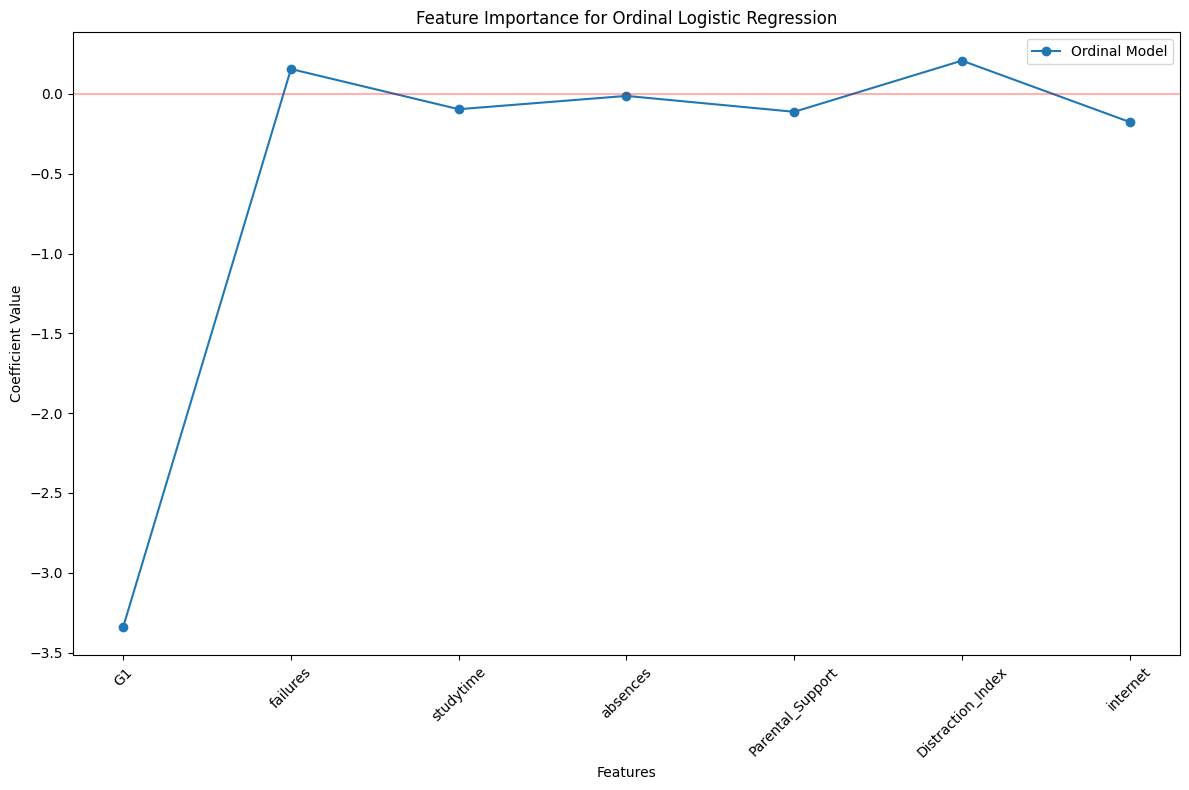

In [52]:
def categorizeGrades(grade):
    if grade >= 16:
        return 1 
    elif grade >= 14:
        return 2  
    elif grade >= 12:
        return 3  
    elif grade >= 10:
        return 4  
    else:
        return 5  

porData['gradeCategory'] = porData['G3'].apply(categorizeGrades)
porData['passFail'] = (porData['G3'] >= 10).astype(int)
if porData['internet'].dtype == 'object':
    porData['internet'] = porData['internet'].map({'yes': 1, 'no': 0})

ordinalFeatures = [
    'G1',               
    'failures',         
    'studytime',        
    'absences',         
    'Parental_Support', 
    'Distraction_Index',
    'internet'          
]

xOrd = porData[ordinalFeatures]
yOrd = porData['gradeCategory']
xOrdTrainScaled, xOrdTestScaled, yOrdTrain, yOrdTest, scalerOrd = prepareData(xOrd, yOrd)

xOrdTrainDF = pd.DataFrame(xOrdTrainScaled, columns=ordinalFeatures)
xOrdTestDF = pd.DataFrame(xOrdTestScaled, columns=ordinalFeatures)
yOrdTrain = pd.Series(yOrdTrain).reset_index(drop=True)
yOrdTest = pd.Series(yOrdTest).reset_index(drop=True)

ordinalModel = OrderedModel(yOrdTrain, xOrdTrainDF, distr='logit')
ordinalResult = ordinalModel.fit(method='bfgs', maxiter=1000)
print(ordinalResult.summary())

probabilities = ordinalResult.predict(xOrdTestDF)
yOrdPred = probabilities.idxmax(axis=1)
accuracy = accuracy_score(yOrdTest, yOrdPred)
accuracyScoresOrd = [accuracy]  
avgAccuracy = accuracy  
print(f"Ordinal Logistic Regression Accuracy: {avgAccuracy:.4f}")

featureImportance = {}
featureImportance[1] = dict(zip(ordinalFeatures, ordinalResult.params[:len(ordinalFeatures)]))

for gradeLevel, importance in featureImportance.items():
    print(f"\nFeature importance for ordinal model:")
    sortedImportance = {k: v for k, v in sorted(importance.items(), 
                        key=lambda item: abs(item[1]), reverse=True)}
    for feature, coef in sortedImportance.items():
        print(f"{feature}: {coef:.4f}")

def ordinal_cv_score(X, y, cv=5):
    fold_scores = []
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    
    for train_idx, test_idx in kf.split(X):
        X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
        y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]
        
        X_train_fold_scaled = scalerOrd.fit_transform(X_train_fold)
        X_test_fold_scaled = scalerOrd.transform(X_test_fold)
        
        X_train_fold_df = pd.DataFrame(X_train_fold_scaled, columns=ordinalFeatures)
        X_test_fold_df = pd.DataFrame(X_test_fold_scaled, columns=ordinalFeatures)
        
        X_train_fold_df = X_train_fold_df.reset_index(drop=True)
        X_test_fold_df = X_test_fold_df.reset_index(drop=True)
        y_train_fold = pd.Series(y_train_fold.values).reset_index(drop=True)
        y_test_fold = pd.Series(y_test_fold.values).reset_index(drop=True)
        
        try:
            model = OrderedModel(y_train_fold, X_train_fold_df, distr='logit')
            result = model.fit(method='bfgs', maxiter=1000, disp=0)
            probs = result.predict(X_test_fold_df)
            preds = probs.idxmax(axis=1)
            fold_scores.append(accuracy_score(y_test_fold, preds))
        except Exception as e:
            print(f"Warning: Issue in a fold: {e}")
    
    return np.mean(fold_scores) if fold_scores else None

cvScore = ordinal_cv_score(xOrd, yOrd, cv=5)
cvScores = [cvScore] 
print(f"5-fold CV accuracy for ordinal logistic regression: {cvScore:.4f}")

plt.figure(figsize=(12, 8))
for gradeLevel, importance in featureImportance.items():
    values = [importance[feature] for feature in ordinalFeatures]
    plt.plot(ordinalFeatures, values, marker='o', label=f'Ordinal Model')

plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance for Ordinal Logistic Regression')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Number of features: 1
Selected features: ['Medu']
CV Score: 0.5268

Number of features: 2
Selected features: ['Medu', 'Fedu']
CV Score: 0.5314

Number of features: 3
Selected features: ['Medu', 'Fedu', 'famsup']
CV Score: 0.5468

Number of features: 4
Selected features: ['Medu', 'Fedu', 'famsup', 'famrel']
CV Score: 0.5468

Number of features: 5
Selected features: ['Medu', 'Fedu', 'famsup', 'famrel', 'famsize']
CV Score: 0.5468

Number of features: 6
Selected features: ['Medu', 'Fedu', 'Pstatus', 'famsup', 'famrel', 'famsize']
CV Score: 0.5468

Best combination of family factors: ['Medu', 'Fedu', 'famsup']
CV Score with this combination: 0.5468


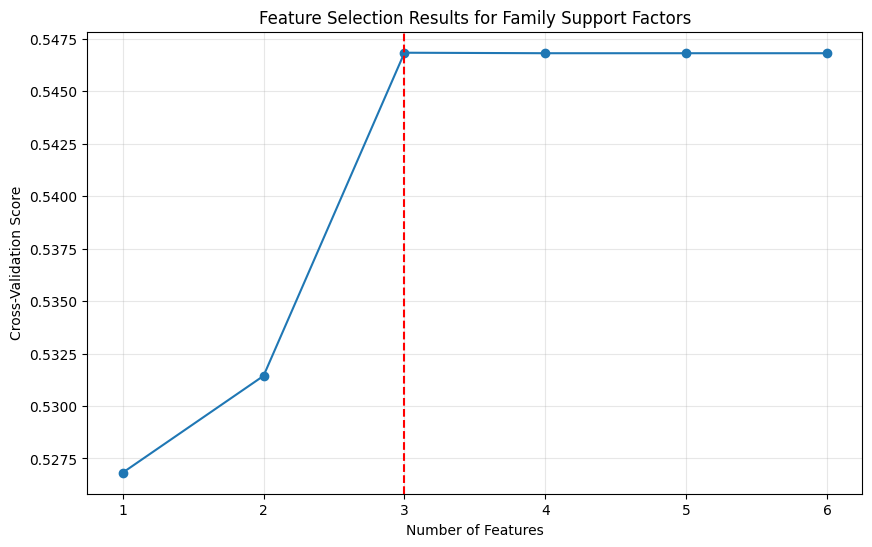

In [53]:
familyFeatures = [
    'Medu',     
    'Fedu',     
    'Pstatus',  
    'famsup',   
    'famrel',   
    'famsize',  
]

for feature in familyFeatures:
    if porData[feature].dtype == 'object':
        if porData[feature].nunique() == 2:
            porData[feature] = porData[feature].map(lambda x: 1 if x == 'yes' else 0)

xFamily = porData[familyFeatures]
yFamily = porData['passFail']
xFamTrainScaled, xFamTestScaled, yFamTrain, yFamTest, scalerFam = prepareData(xFamily, yFamily, stratify=yFamily)


modelFam = LogisticRegression(max_iter=1000, class_weight='balanced')

rfeResults = {}

for numFeatures in range(1, len(familyFeatures) + 1):
    rfe = RFE(modelFam, n_features_to_select=numFeatures)
    rfe.fit(xFamTrainScaled, yFamTrain)
    
    selectedFeatures = [familyFeatures[i] for i, selected in enumerate(rfe.support_) if selected]
    
    cvScore = cross_val_score(modelFam, xFamily[selectedFeatures], yFamily, cv=5).mean()
    rfeResults[numFeatures] = {
        'features': selectedFeatures,
        'cv_score': cvScore
    }
    
    print(f"Number of features: {numFeatures}")
    print(f"Selected features: {selectedFeatures}")
    print(f"CV Score: {cvScore:.4f}\n")

bestNumFeatures = max(rfeResults, key=lambda x: rfeResults[x]['cv_score'])
bestFeatures = rfeResults[bestNumFeatures]['features']
bestScore = rfeResults[bestNumFeatures]['cv_score']

print(f"Best combination of family factors: {bestFeatures}")
print(f"CV Score with this combination: {bestScore:.4f}")

plt.figure(figsize=(10, 6))
numFeaturesList = list(rfeResults.keys())
cvScoresList = [rfeResults[n]['cv_score'] for n in numFeaturesList]

plt.plot(numFeaturesList, cvScoresList, marker='o')
plt.axvline(x=bestNumFeatures, color='r', linestyle='--')
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Score')
plt.title('Feature Selection Results for Family Support Factors')
plt.grid(True, alpha=0.3)
plt.show()


Binary Classification Results:
Accuracy: 0.8256

Classification Report:
              precision    recall  f1-score   support

        Fail       0.46      0.87      0.60        30
        Pass       0.97      0.82      0.89       165

    accuracy                           0.83       195
   macro avg       0.72      0.84      0.75       195
weighted avg       0.89      0.83      0.84       195


Confusion Matrix:
[[ 26   4]
 [ 30 135]]


<Figure size 800x600 with 0 Axes>

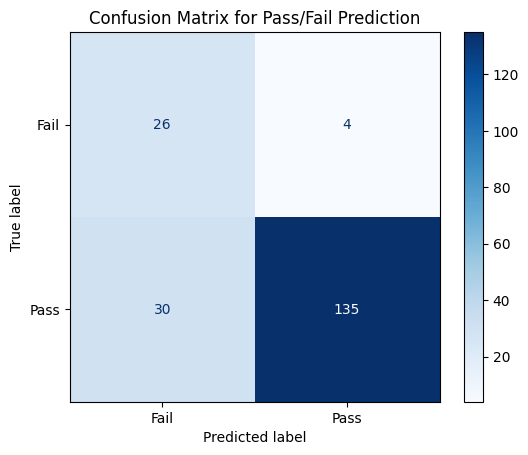


Feature Importance for Pass/Fail Prediction:
G1: 3.1604
Medu: 0.3868
failures: -0.3839
Distraction_Index: -0.2457
studytime: 0.2247
absences: -0.1008
internet: -0.0591
famsup: 0.0385
Fedu: 0.0364


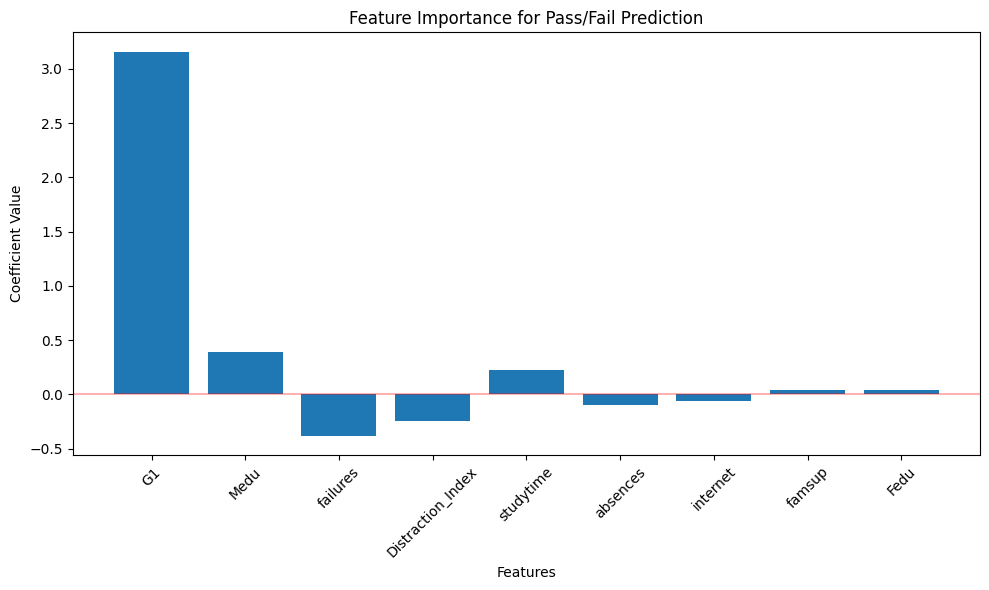


5-fold CV accuracy for binary model: 0.8566 (±0.0382)


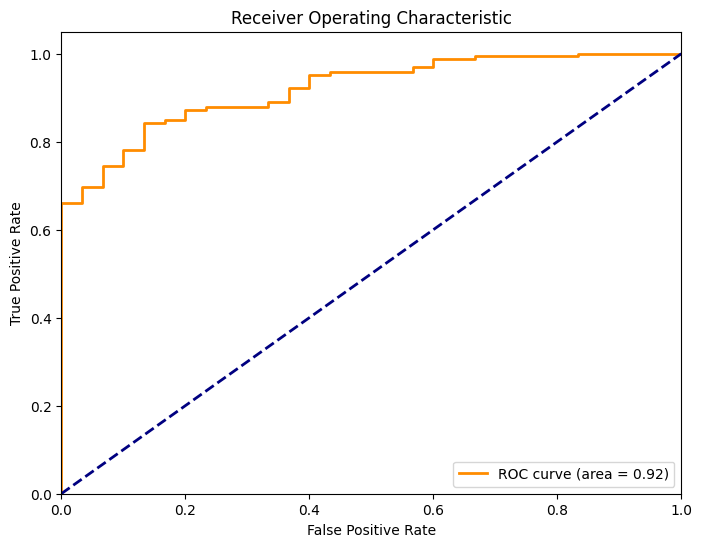

In [54]:
binaryFeatures = [
    'G1',               
    'failures',         
    'studytime',        
    'absences',         
    'Medu',             
    'Fedu',             
    'famsup',           
    'Distraction_Index',
    'internet'         
]

xBin = porData[binaryFeatures]
yBin = porData['passFail']
xBinTrainScaled, xBinTestScaled, yBinTrain, yBinTest, scalerBin = prepareData(xBin, yBin, stratify=yBin)


modelBin = LogisticRegression(max_iter=1000, class_weight='balanced')
modelBin.fit(xBinTrainScaled, yBinTrain)

yBinPred = modelBin.predict(xBinTestScaled)
yBinPredProba = modelBin.predict_proba(xBinTestScaled)[:, 1] 

accuracyBin = accuracy_score(yBinTest, yBinPred)
print(f"\nBinary Classification Results:")
print(f"Accuracy: {accuracyBin:.4f}")

print("\nClassification Report:")
print(classification_report(yBinTest, yBinPred, target_names=['Fail', 'Pass']))

cmBin = confusion_matrix(yBinTest, yBinPred)
print("\nConfusion Matrix:")
print(cmBin)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cmBin, display_labels=['Fail', 'Pass'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Pass/Fail Prediction')
plt.show()

featureImportanceBin = dict(zip(binaryFeatures, modelBin.coef_[0]))
print("\nFeature Importance for Pass/Fail Prediction:")
sortedImportanceBin = {k: v for k, v in sorted(featureImportanceBin.items(), 
                    key=lambda item: abs(item[1]), reverse=True)}
for feature, coef in sortedImportanceBin.items():
    print(f"{feature}: {coef:.4f}")

plt.figure(figsize=(10, 6))
featuresSorted = sorted(featureImportanceBin.keys(), 
                         key=lambda x: abs(featureImportanceBin[x]), reverse=True)
values = [featureImportanceBin[feature] for feature in featuresSorted]
plt.bar(featuresSorted, values)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance for Pass/Fail Prediction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cross-validation
cvScoresBin = cross_val_score(modelBin, xBin, yBin, cv=5)
print(f"\n5-fold CV accuracy for binary model: {cvScoresBin.mean():.4f} (±{cvScoresBin.std():.4f})")

fpr, tpr, _ = roc_curve(yBinTest, yBinPredProba)
rocAuc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {rocAuc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Random Forest for Grade Categories:
Accuracy: 0.5846

Classification Report:
              precision    recall  f1-score   support

   Excellent       0.75      0.68      0.71        31
   Very Good       0.42      0.48      0.45        29
        Good       0.56      0.53      0.54        47
  Sufficient       0.58      0.56      0.57        62
        Fail       0.66      0.73      0.69        26

    accuracy                           0.58       195
   macro avg       0.59      0.60      0.59       195
weighted avg       0.59      0.58      0.59       195


Confusion Matrix:
[[21  9  0  1  0]
 [ 6 14  7  2  0]
 [ 1  5 25 16  0]
 [ 0  5 12 35 10]
 [ 0  0  1  6 19]]


<Figure size 1000x800 with 0 Axes>

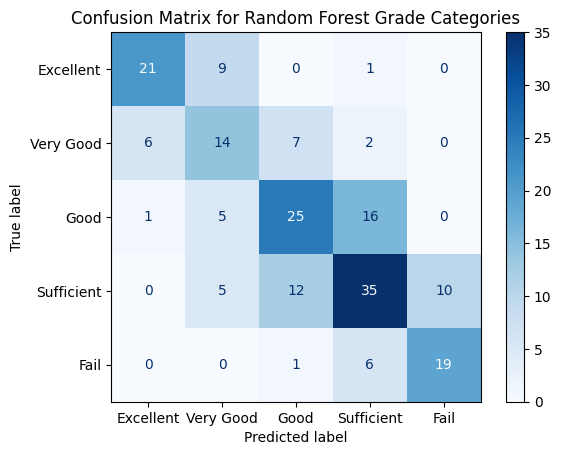


Feature Importance for Grade Categories Prediction:
G1: 0.3515
Distraction_Index: 0.2058
Parental_Support: 0.1785
absences: 0.1266
studytime: 0.0683
failures: 0.0390
internet: 0.0303


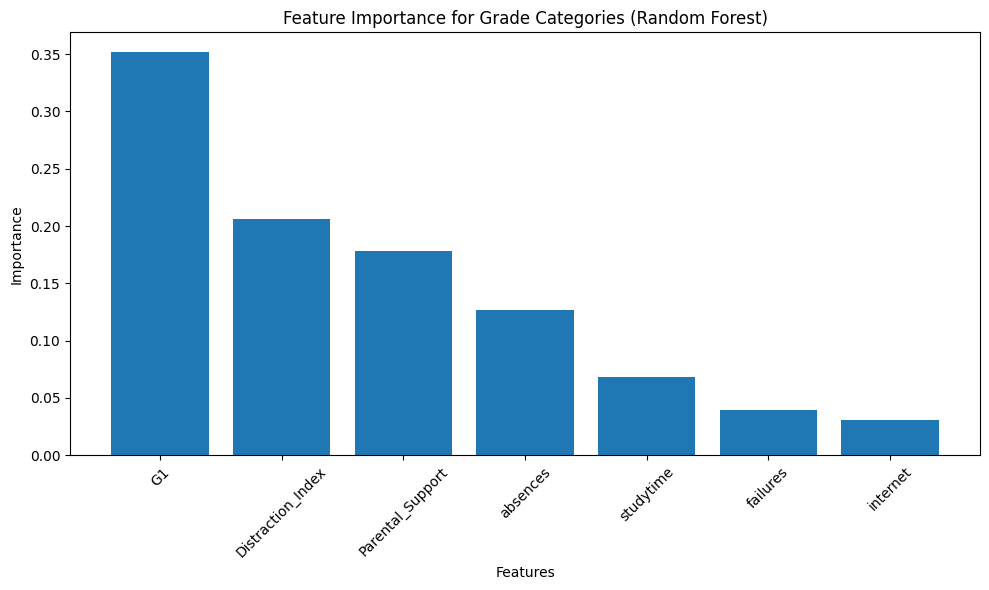


5-fold CV accuracy for Random Forest (grade categories): 0.5362 (±0.0207)


In [55]:
rfFeaturesOrd = ordinalFeatures

xRfOrd = porData[rfFeaturesOrd]
yRfOrd = porData['gradeCategory']
xRfOrdTrainScaled, xRfOrdTestScaled, yRfOrdTrain, yRfOrdTest, scalerRfOrd = prepareData(xRfOrd, yRfOrd)

rfModelOrd = RandomForestClassifier(n_estimators=100, random_state=42)
rfModelOrd.fit(xRfOrdTrainScaled, yRfOrdTrain)

yRfOrdPred = rfModelOrd.predict(xRfOrdTestScaled)

accuracyRfOrd = accuracy_score(yRfOrdTest, yRfOrdPred)
print("Random Forest for Grade Categories:")
print(f"Accuracy: {accuracyRfOrd:.4f}")

print("\nClassification Report:")
print(classification_report(yRfOrdTest, yRfOrdPred, 
                           target_names=['Excellent', 'Very Good', 'Good', 'Sufficient', 'Fail']))


cmRfOrd = confusion_matrix(yRfOrdTest, yRfOrdPred)
print("\nConfusion Matrix:")
print(cmRfOrd)

plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cmRfOrd, 
                              display_labels=['Excellent', 'Very Good', 'Good', 'Sufficient', 'Fail'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest Grade Categories')
plt.show()

featureImportanceRfOrd = dict(zip(rfFeaturesOrd, rfModelOrd.feature_importances_))
print("\nFeature Importance for Grade Categories Prediction:")
sortedImportanceRfOrd = {k: v for k, v in sorted(featureImportanceRfOrd.items(), 
                                               key=lambda item: item[1], reverse=True)}
for feature, importance in sortedImportanceRfOrd.items():
    print(f"{feature}: {importance:.4f}")

plt.figure(figsize=(10, 6))
featuresSortedRfOrd = sorted(featureImportanceRfOrd.keys(), 
                           key=lambda x: featureImportanceRfOrd[x], reverse=True)
valuesRfOrd = [featureImportanceRfOrd[feature] for feature in featuresSortedRfOrd]
plt.bar(featuresSortedRfOrd, valuesRfOrd)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Grade Categories (Random Forest)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

cvScoresRfOrd = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), 
                               xRfOrd, yRfOrd, cv=5)
print(f"\n5-fold CV accuracy for Random Forest (grade categories): {cvScoresRfOrd.mean():.4f} (±{cvScoresRfOrd.std():.4f})")



Random Forest for Pass/Fail Prediction:
Accuracy: 0.8769

Classification Report:
              precision    recall  f1-score   support

        Fail       0.62      0.53      0.57        30
        Pass       0.92      0.94      0.93       165

    accuracy                           0.88       195
   macro avg       0.77      0.74      0.75       195
weighted avg       0.87      0.88      0.87       195


Confusion Matrix:
[[ 16  14]
 [ 10 155]]


<Figure size 800x600 with 0 Axes>

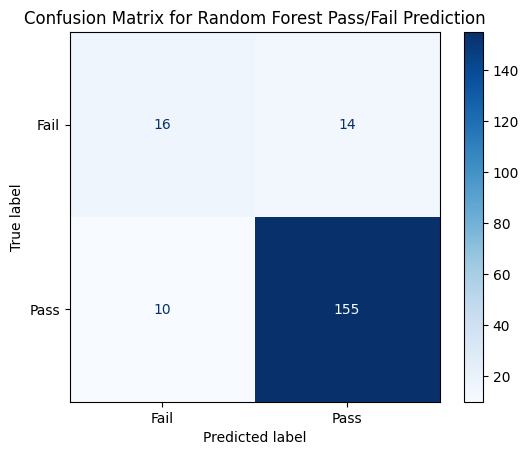


Feature Importance for Pass/Fail Prediction:
G1: 0.5225
failures: 0.1265
Distraction_Index: 0.1257
absences: 0.0638
Medu: 0.0502
Fedu: 0.0418
studytime: 0.0320
internet: 0.0206
famsup: 0.0170


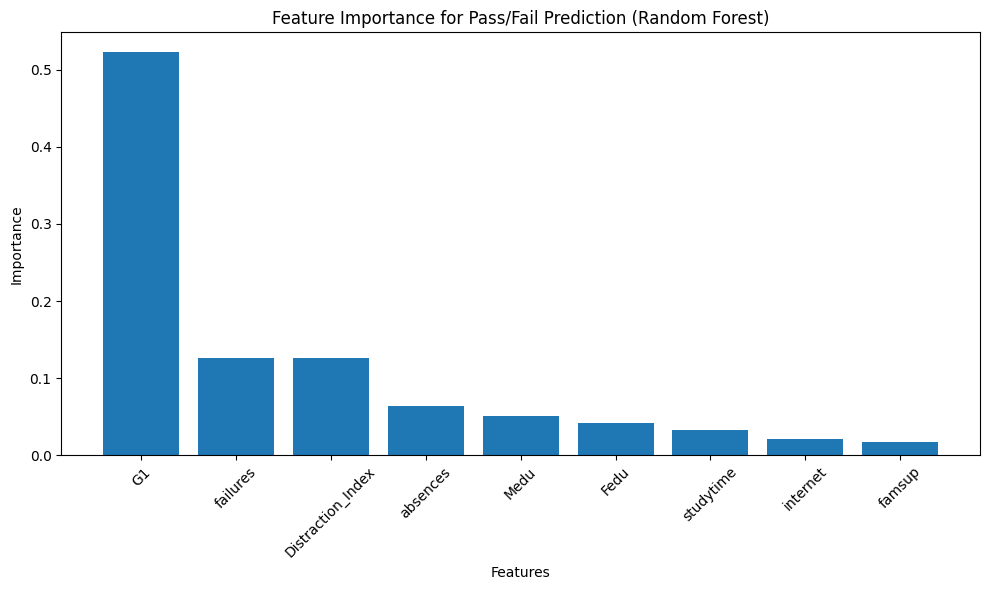


5-fold CV accuracy for Random Forest (pass/fail): 0.8859 (±0.0329)


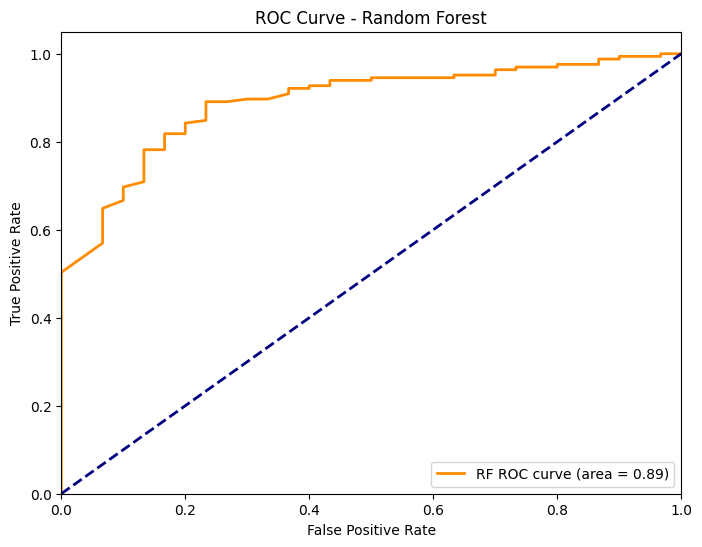

In [56]:
rfFeaturesBin = binaryFeatures

xRfBin = porData[rfFeaturesBin]
yRfBin = porData['passFail']
xRfBinTrainScaled, xRfBinTestScaled, yRfBinTrain, yRfBinTest, scalerRfBin = prepareData(xRfBin, yRfBin, stratify=yRfBin)

rfModelBin = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rfModelBin.fit(xRfBinTrainScaled, yRfBinTrain)

yRfBinPred = rfModelBin.predict(xRfBinTestScaled)
yRfBinPredProba = rfModelBin.predict_proba(xRfBinTestScaled)[:, 1]

accuracyRfBin = accuracy_score(yRfBinTest, yRfBinPred)
print("\nRandom Forest for Pass/Fail Prediction:")
print(f"Accuracy: {accuracyRfBin:.4f}")

print("\nClassification Report:")
print(classification_report(yRfBinTest, yRfBinPred, target_names=['Fail', 'Pass']))

cmRfBin = confusion_matrix(yRfBinTest, yRfBinPred)
print("\nConfusion Matrix:")
print(cmRfBin)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cmRfBin, display_labels=['Fail', 'Pass'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest Pass/Fail Prediction')
plt.show()

featureImportanceRfBin = dict(zip(rfFeaturesBin, rfModelBin.feature_importances_))
print("\nFeature Importance for Pass/Fail Prediction:")
sortedImportanceRfBin = {k: v for k, v in sorted(featureImportanceRfBin.items(), 
                                               key=lambda item: item[1], reverse=True)}
for feature, importance in sortedImportanceRfBin.items():
    print(f"{feature}: {importance:.4f}")

plt.figure(figsize=(10, 6))
featuresSortedRfBin = sorted(featureImportanceRfBin.keys(), 
                           key=lambda x: featureImportanceRfBin[x], reverse=True)
valuesRfBin = [featureImportanceRfBin[feature] for feature in featuresSortedRfBin]
plt.bar(featuresSortedRfBin, valuesRfBin)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Pass/Fail Prediction (Random Forest)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

cvScoresRfBin = cross_val_score(RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42), 
                               xRfBin, yRfBin, cv=5)
print(f"\n5-fold CV accuracy for Random Forest (pass/fail): {cvScoresRfBin.mean():.4f} (±{cvScoresRfBin.std():.4f})")

fprRf, tprRf, _ = roc_curve(yRfBinTest, yRfBinPredProba)
rocAucRf = auc(fprRf, tprRf)

plt.figure(figsize=(8, 6))
plt.plot(fprRf, tprRf, color='darkorange', lw=2, label=f'RF ROC curve (area = {rocAucRf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


Model Comparison - Grade Categories:
Logistic Regression - Average Accuracy: 0.1641
Random Forest - Accuracy: 0.5846
Logistic Regression - CV Accuracy: 0.1834
Random Forest - CV Accuracy: 0.5362

Model Comparison - Pass/Fail Prediction:
Logistic Regression - Accuracy: 0.8256
Random Forest - Accuracy: 0.8769
Logistic Regression - CV Accuracy: 0.8566
Random Forest - CV Accuracy: 0.8859


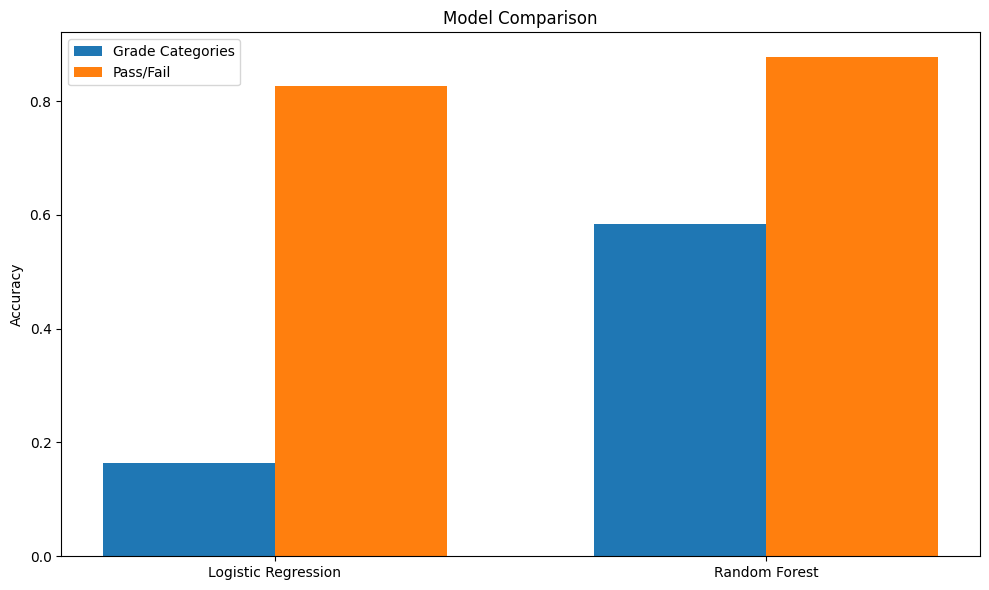

In [57]:
print("\nModel Comparison - Grade Categories:")
print(f"Logistic Regression - Average Accuracy: {avgAccuracy:.4f}")
print(f"Random Forest - Accuracy: {accuracyRfOrd:.4f}")
print(f"Logistic Regression - CV Accuracy: {np.mean(cvScores):.4f}")
print(f"Random Forest - CV Accuracy: {cvScoresRfOrd.mean():.4f}")

print("\nModel Comparison - Pass/Fail Prediction:")
print(f"Logistic Regression - Accuracy: {accuracyBin:.4f}")
print(f"Random Forest - Accuracy: {accuracyRfBin:.4f}")
print(f"Logistic Regression - CV Accuracy: {cvScoresBin.mean():.4f}")
print(f"Random Forest - CV Accuracy: {cvScoresRfBin.mean():.4f}")

plt.figure(figsize=(10, 6))
models = ['Logistic Regression', 'Random Forest']
accuracies_categories = [avgAccuracy, accuracyRfOrd]
accuracies_passfail = [accuracyBin, accuracyRfBin]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, accuracies_categories, width, label='Grade Categories')
plt.bar(x + width/2, accuracies_passfail, width, label='Pass/Fail')

plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(x, models)
plt.legend()
plt.tight_layout()
plt.show()